In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [76]:
iris=load_iris()
X = iris.data[:, :4]  
Y= iris.target
X=np.array(X)
Y=np.array(Y)
#Y=Y.reshape(150,1)
#print(X)
#print(Y.shape)
#print(Y)

Text(0.5, 0, 'pedal_length')

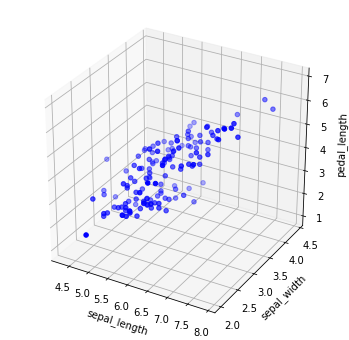

In [77]:
fig=plt.figure(figsize=(6,6))
p=plt.axes(projection='3d')
p.scatter(X[0:50,0],X[0:50,1],X[0:50,2],c='blue')
p.scatter(X[51:100,0],X[51:100,1],X[51:100,2],c='blue')
p.scatter(X[101:150,0],X[101:150,1],X[101:150,2],c='blue')
p.set_xlabel('sepal_length')
p.set_ylabel('sepal_width')
p.set_zlabel('pedal_length')

In [78]:
class KnearestNeighbors:
   
    def __init__(self,k):
        self.k=k
        
    #train    
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
        #to know the count of classes
        self.number_of_classes=len(np.unique(y_train))
        #print(self.number_of_classes)
        
    #test    
    
    def nearNeighbors(self,x_test):
        distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[0:self.k]
        return near_neighbors
        
    def predict(self,x_test):
        near_neighbors=self.nearNeighbors(x_test)
        y_pred=np.argmax(np.bincount(self.y_train[near_neighbors]))
        return y_pred
    
    def evaluate(self,X_test,y_test):
        num_of_correct_pred=0
        self.X_test=X_test
        self.y_test=y_test
        y=[]
        
        for i in range(len(X_test)):
            y.append(self.predict(X_test[i]))
        #print(y)    

        for i in range(len(y)):
            if(y_test[i]==y[i]):
                num_of_correct_pred +=1

        accuracy=(num_of_correct_pred/len(y_test))*100        
        print(num_of_correct_pred)
        return accuracy

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


28
K = 1 : 93.33333333333333
28
K = 3 : 93.33333333333333
28
K = 5 : 93.33333333333333
28
K = 7 : 93.33333333333333
30
K = 9 : 100.0
29
K = 11 : 96.66666666666667
30
K = 13 : 100.0
30
K = 15 : 100.0


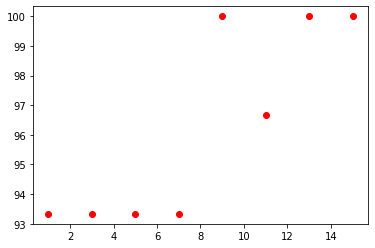

In [80]:
X_axis=[1,3,5,7,9,11,13,15]
acc=[]


for i in range(1,16,2):
  knn=KnearestNeighbors(i)
  knn.fit(X_train,y_train)
  accuracy=knn.evaluate(X_test,y_test)
  print("K =",i,":",accuracy)
  acc.append(accuracy)
  


plt.scatter(X_axis,acc,c='red')
#plt.fill_between(X_axis,acc)
plt.show()

[[5 2 4]
 [1 4 4]
 [6 1 3]]


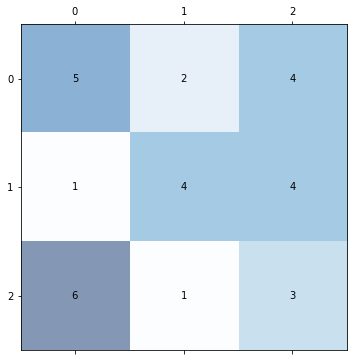

In [81]:
Setosa_Setosa=0
Setosa_Versicolour=0
Setosa_Virginica=0

Versicolour_Setosa=0
Versicolour_Vesicolour=0
Versicolour_Virginica=0

Virginica_Setosa=0
Virginica_Versicolour=0
Virginica_Viginica=0

for i in range(len(y_test)):
  if y_test[i]==0 and y[i]==0:
    Setosa_Setosa +=1
  if y_test[i]==0 and y[i]==1:
    Setosa_Versicolour +=1
  if y_test[i]==0 and y[i]==2:
    Setosa_Virginica +=1    
  if y_test[i]==1 and y[i]==0:
    Versicolour_Setosa +=1
  if y_test[i]==1 and y[i]==1:
    Versicolour_Vesicolour +=1
  if y_test[i]==1 and y[i]==2:
    Versicolour_Virginica +=1
  if y_test[i]==2 and y[i]==0:
    Virginica_Setosa +=1
  if y_test[i]==2 and y[i]==1:
    Virginica_Versicolour +=1     
  if y_test[i]==2 and y[i]==2:
    Virginica_Viginica +=1     

conf_mat=np.array([[Setosa_Setosa,Setosa_Versicolour,Setosa_Virginica],
                   [Versicolour_Setosa,Versicolour_Vesicolour,Versicolour_Virginica],
                   [Virginica_Setosa,Virginica_Versicolour,Virginica_Viginica]]) 
print(conf_mat)   

fig,ax=plt.subplots(figsize=(6,6))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.5)
for i in range(conf_mat.shape[0]):
  for j in range(conf_mat.shape[1]):
    
       ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
   


In [82]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

label=0

KNN=KNeighborsClassifier(5)
KNN.fit(X,Y)
y=KNN.predict(X_test)
for i in range(len(y)):
    if (y[i]==y_test[i]):
        label=label+1
        
accuracy=(label/len(y_test))*100

print("The accuracy of sklearn :",accuracy)

The accuracy of sklearn : 93.33333333333333
